![alt text](header.png)

# 📚 Importación de librerías

In [1]:
# Librerías para procesamiento de datos
import os
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta, date

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#Librerías para preprocesamiento de datos


In [3]:
# Importación de los datos
df = pd.read_csv('./datos/df.csv', dtype={
    'es_fraude':'Int64',
    'tipo':'string',
    'mensaje_alarma':'string',
    'origen':'string',
    'destino':'string'
    })

In [6]:
# Muestra aleatoria de 5 instancias del dataset
df.sample(5)

,t_id,origen,destino,cuantia,es_fraude,mensaje_alarma,hora_transaccion,tipo,balance_prev_or,balance_post_or,balance_prev_des,balance_post_des
4537540,4537612,C293933255,C1686077784,664307.70,0,No_detectado_fraude,2022-09-14 21:00:00,TRANSFER,0.00,0.00,2769424.72,3433732.42
1305664,1305685,C1902356433,C868461635,138165.77,0,No_detectado_fraude,2022-09-06 23:00:00,CASH_IN,5668787.45,5806953.22,734932.94,596767.16
6312578,6312678,C1561794952,C992001105,98861.63,0,No_detectado_fraude,2022-09-29 21:00:00,CASH_IN,782.00,99643.63,0.00,0.00
236135,236139,C100379469,C645898745,161569.81,0,No_detectado_fraude,2022-09-01 21:00:00,CASH_IN,3339890.95,3501460.77,3109600.61,3236802.55
4214477,4214545,C1116272236,C1749186397,446951.64,0,No_detectado_fraude,2022-09-14,CASH_OUT,11871.00,0.00,4944648.16,5391599.79


# 🔝 Información del dataset

In [82]:
print(f'· Contexto: transacciones hechas por los clientes de Pontia Bank entre el {df['hora_transaccion'].min()} y el {df['hora_transaccion'].max()}.\n')
print(f'· Conteo de transacciones totales: {df.count()[0]} siendo fraudulentas (es_fraude = 1) {df['es_fraude'].value_counts()[1]} transacciones.\n')
print(f'· Desbalanceo de clases: El {((df['es_fraude'].value_counts()[1]/df.count()[0])*100).round(3)}% de las transacciones son positivas respecto del total de transacciones\n')
print(f'· Target: es_fraude, 1 para fraude, 0 para el resto de casos.')




· Contexto: transacciones hechas por los clientes de Pontia Bank entre el 2022-09-01 08:00:00 y el 2022-10-02 06:00:00.

· Conteo de transacciones totales: 6362520 siendo fraudulentas (es_fraude = 1) 8209 transacciones.

· Class imbalance: El 0.129% de las transacciones son positivas respecto del total de transacciones

· Target: es_fraude, 1 para fraude, 0 para el resto de casos.


# 📉 Análisis exploratorio de datos

In [83]:
# Primeros y últimos registros del dataset
display(df.head())
print("\n --------------------------------------------------------------------------------------------------------------------------------------------------------------------- \n")
display(df.tail())

,t_id,origen,destino,cuantia,es_fraude,mensaje_alarma,hora_transaccion,tipo,balance_prev_or,balance_post_or,balance_prev_des,balance_post_des
0,0,C1231006815,M1979787155,9839.64,0,No_detectado_fraude,2022-09-01 08:00:00,PAYMENT,170136.0,160296.36,0.0,0.0
1,1,C1666544295,M2044282225,1864.28,0,No_detectado_fraude,2022-09-01 08:00:00,PAYMENT,21249.0,19384.72,0.0,0.0
2,2,C1305486145,C553264065,181.00,1,No_detectado_fraude,2022-09-01 08:00:00,TRANSFER,181.0,0.00,0.0,0.0
3,3,C840083671,C38997010,181.00,1,No_detectado_fraude,2022-09-01 08:00:00,CASH_OUT,181.0,0.00,21182.0,0.0
4,4,C2048537720,M1230701703,11668.14,0,No_detectado_fraude,2022-09-01 08:00:00,PAYMENT,41554.0,29885.86,0.0,0.0



 --------------------------------------------------------------------------------------------------------------------------------------------------------------------- 



,t_id,origen,destino,cuantia,es_fraude,mensaje_alarma,hora_transaccion,tipo,balance_prev_or,balance_post_or,balance_prev_des,balance_post_des
6362515,6362615,C786484425,C776919290,339682.13,1,No_detectado_fraude,2022-10-02 06:00:00,CASH_OUT,339682.13,0.0,0.00,339682.13
6362516,6362616,C1529008245,C1881841831,6311409.28,1,No_detectado_fraude,2022-10-02 06:00:00,TRANSFER,6311409.28,0.0,0.00,0.00
6362517,6362617,C1162922333,C1365125890,6311409.28,1,No_detectado_fraude,2022-10-02 06:00:00,CASH_OUT,6311409.28,0.0,68488.84,6379898.11
6362518,6362618,C1685995037,C2080388513,850002.52,1,No_detectado_fraude,2022-10-02 06:00:00,TRANSFER,850002.52,0.0,0.00,0.00
6362519,6362619,C1280323807,C873221189,850002.52,1,No_detectado_fraude,2022-10-02 06:00:00,CASH_OUT,850002.52,0.0,6510099.11,7360101.63


In [157]:
# Valores nulos por columnas
print('Valores nulos por columna:\n', display(df.isnull().sum()))

t_id                0
origen              0
destino             0
cuantia             0
es_fraude           0
mensaje_alarma      0
hora_transaccion    0
tipo                0
balance_prev_or     0
balance_post_or     0
balance_prev_des    0
balance_post_des    0
dtype: int64

Valores nulos por columna:
 None


In [4]:
# Estadísticas
print('Estadísticas:\n*********************************************\n')
df.describe()

Estadísticas:
*********************************************



,t_id,cuantia,es_fraude,balance_prev_or,balance_post_or,balance_prev_des,balance_post_des
count,6.362520e+06,6.362520e+06,6362520.0,6.362520e+06,6.362520e+06,6.362520e+06,6.362520e+06
mean,3.181312e+06,1.798620e+05,0.00129,8.338892e+05,8.551206e+05,1.100707e+06,1.225002e+06
std,1.836730e+06,6.038617e+05,0.035896,2.888257e+06,2.924063e+06,3.399201e+06,3.674152e+06
min,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.590656e+06,1.338957e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.181316e+06,7.487271e+04,0.0,1.420800e+04,0.000000e+00,1.327077e+05,2.146622e+05
75%,4.771964e+06,2.087216e+05,0.0,1.073150e+05,1.442585e+05,9.430375e+05,1.111909e+06
max,6.362619e+06,9.244552e+07,1.0,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


## 💠 Forma e información variable objetivo

In [91]:
# Forma del dataset (número de filas y columnas)
print(f'· El dataset contiene {df.shape[0]} filas y {df.shape[1]} columnas.')

# Categorías de clase únicas en la columna es_fraude
print('Clases de categorías de "es_fraude":', df['es_fraude'].unique())

# Número de registros con valor 0 en la clase es_fraude
print(f'Número de registros con valor 0 en la clase es_fraude:', (df['es_fraude'] == 0).sum())

# Número de registros con valor 1 en la clase es_fraude
print(f'Número de registros con valor 1 en la clase es_fraude:', (df['es_fraude'] == 1).sum())

· El dataset contiene 6362520 filas y 12 columnas.
Clases de categorías de "es_fraude": <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
Número de registros con valor 0 en la clase es_fraude: 6354311
Número de registros con valor 1 en la clase es_fraude: 8209


## ⚖️ Gráfico desbalanceo de clases

In [ ]:
# Gráfico para visualizar el desbalanceo de clases

counts = df['es_fraude'].value_counts().reset_index()
counts.columns = ['Clase', 'Recuento']
counts['Clase'] = counts['Clase'].astype(str)
color_palette = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
# https://coolors.co/palette/264653-2a9d8f-e9c46a-f4a261-e76f51


fig = px.bar(
    counts,
    x='Clase',
    y='Recuento',
    color='Clase',
    color_discrete_sequence=color_palette,
    title='Desbalance de Clases en "es_fraude"',
    labels={'Clase':'Valor de es_fraude', 'Recuento':'Número de transacciones'}
)

fig.update_layout(
    width=700,   # ajusta el ancho
    height=600,  # ajusta la altura si lo deseas
    bargap=0.5,  # controla el espacio entre barras
)

fig.update_yaxes(type='log') # Lo pongo en escala logarítmica para que se aprecie en el gráfico
fig.update_layout(coloraxis_showscale=False)
fig.show()

## 💱 Tipo de transacciones

In [133]:
# Valores del tipo de transacciones
print(f'Tipo de transacciones: {df['tipo'].unique().tolist()}\n')

# Recuento tipo de transacciones
print(f'Recuento tipo de transacciones: {df['tipo'].value_counts()}')

Tipo de transacciones: ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']

Recuento tipo de transacciones: tipo
CASH_OUT    2237463
PAYMENT     2151458
CASH_IN     1399270
TRANSFER     532897
DEBIT         41432
Name: count, dtype: Int64


In [143]:
# Gráfico para visualizar la distribución del tipo de transferencias
counts = df['tipo'].value_counts().reset_index()
counts.columns = ['tipo', 'frecuencia']
color_palette = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']

fig = px.bar(
    counts,
    x='frecuencia',
    y='tipo',
    orientation='h',
    color='tipo',
    color_discrete_sequence=color_palette,
    title='Distribución de Tipos de Transacción (Horizontal)',
    labels={
        'tipo': 'Tipo de Transacción',
        'frecuencia': 'Número de Transacciones'
    }
)

fig.update_layout(
    width=800,     # Ajustar ancho
    height=600,    # Ajustar alto
    bargap=0.2     # Espacio entre barras
)

fig.show()


## 💱 Tipo de operaciones comunes a fraude

In [14]:
# Gráfico para visualizar la distribución del tipo de transacción fraudulenta
counts = df[df['es_fraude'] == 1]['tipo'].value_counts().reset_index()
counts.columns = ['tipo', 'frecuencia']
color_palette = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']

fig = px.bar(
    counts,
    x='tipo',
    y='frecuencia',
    color='tipo',
    color_discrete_sequence=color_palette,
    title='Distribución de Tipos de Transacción Fraudulenta',
    labels={
        'tipo': 'Tipo de Transacción',
        'frecuencia': 'Número de Transacciones'
    }
)

fig.update_layout(
    width=600,     # Ajustar ancho
    height=600,    # Ajustar alto
    bargap=0.2     # Espacio entre barras
)

fig.show()

In [14]:
df[df['es_fraude'] == 1].sample(10)

,t_id,origen,destino,cuantia,es_fraude,mensaje_alarma,hora_transaccion,tipo,balance_prev_or,balance_post_or,balance_prev_des,balance_post_des
1059483,1059502,C1514427330,C2103550727,4589441.44,1,No_detectado_fraude,2022-09-05 10:00:00,TRANSFER,4589441.44,0.00,0.00,0.00
6008331,6008425,C1606056333,C2110335244,2040374.55,1,No_detectado_fraude,2022-09-19 09:00:00,CASH_OUT,2040374.55,0.00,50729.93,2091104.48
6296561,6296661,C1561550785,C1078506798,327773.15,1,No_detectado_fraude,2022-09-29 11:00:00,CASH_OUT,327773.15,0.00,696949.46,1024722.61
1932166,1932202,C450561445,C1075348177,2177218.43,1,No_detectado_fraude,2022-09-08 12:00:00,CASH_OUT,2177218.43,0.00,0.00,2177218.43
6361621,6361721,C48892155,C281499391,10000000.00,1,No_detectado_fraude,2022-10-01 05:00:00,TRANSFER,19749042.95,9749042.95,0.00,0.00
33912,33913,C1825456600,C570409417,29707.86,1,No_detectado_fraude,2022-09-01 15:00:00,TRANSFER,29707.86,0.00,0.00,0.00
6010766,6010860,C1855594531,C301687974,10000000.00,1,No_detectado_fraude,2022-09-19 19:00:00,CASH_OUT,10000000.00,0.00,185609.51,10185609.51
2382130,2382172,C1950985216,C1535946302,295054.68,1,No_detectado_fraude,2022-09-09 14:00:00,TRANSFER,295054.68,0.00,0.00,0.00
6062003,6062097,C1980530073,C1685608858,66066.73,1,No_detectado_fraude,2022-09-22 05:00:00,TRANSFER,66066.73,0.00,0.00,0.00
4315366,4315436,C2030660606,C1098443300,6647155.99,1,No_detectado_fraude,2022-09-14 03:00:00,CASH_OUT,6647155.99,0.00,0.00,6647155.99


## 💵 Cuantía vs es_fraude

<Axes: xlabel='es_fraude', ylabel='cuantia'>

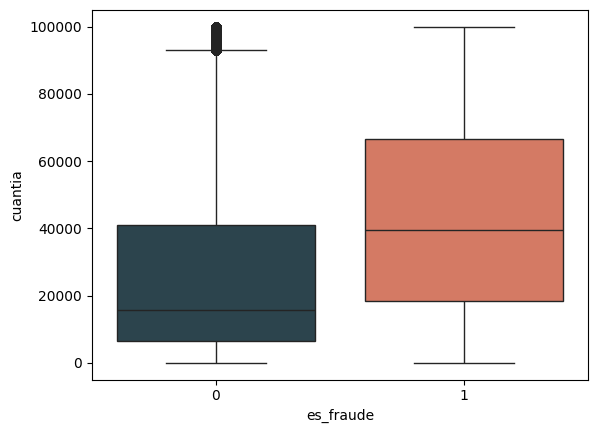

In [4]:
sns.boxplot(x='es_fraude', y='cuantia', data=df[df.cuantia < 1e5], palette={'0': '#264653', '1': '#e76f51'})

## ⚡Alarma fraude

In [19]:
display(df[df['mensaje_alarma'] == 'Detectado_fraude'])

print(f'Existen {df['mensaje_alarma'].value_counts()[1]} registros en los que ha saltado la alarma.')

,t_id,origen,destino,cuantia,es_fraude,mensaje_alarma,hora_transaccion,tipo,balance_prev_or,balance_post_or,balance_prev_des,balance_post_des
2736399,2736446,C728984460,C639921569,4953893.08,1,Detectado_fraude,2022-09-10 03:00:00,TRANSFER,4953893.08,4953893.08,0.0,0.0
3247240,3247297,C1100582606,C1147517658,1343002.08,1,Detectado_fraude,2022-09-11 17:00:00,TRANSFER,1343002.08,1343002.08,0.0,0.0
3760224,3760288,C1035541766,C1100697970,536624.41,1,Detectado_fraude,2022-09-12 22:00:00,TRANSFER,536624.41,536624.41,0.0,0.0
5563622,5563713,C908544136,C891140444,4892193.09,1,Detectado_fraude,2022-09-17 10:00:00,TRANSFER,4892193.09,4892193.09,0.0,0.0
5996313,5996407,C689608084,C1392803603,10000000.00,1,Detectado_fraude,2022-09-19 00:00:00,TRANSFER,19585040.37,19585040.37,0.0,0.0
5996315,5996409,C452586515,C1109166882,9585040.37,1,Detectado_fraude,2022-09-19 00:00:00,TRANSFER,19585040.37,19585040.37,0.0,0.0
6168403,6168499,C193696150,C484597480,3576297.10,1,Detectado_fraude,2022-09-24 09:00:00,TRANSFER,3576297.10,3576297.10,0.0,0.0
6205342,6205439,C1684585475,C1770418982,353874.22,1,Detectado_fraude,2022-09-25 17:00:00,TRANSFER,353874.22,353874.22,0.0,0.0
6266315,6266413,C786455622,C661958277,2542664.27,1,Detectado_fraude,2022-09-27 00:00:00,TRANSFER,2542664.27,2542664.27,0.0,0.0
6281382,6281482,C19004745,C1806199534,10000000.00,1,Detectado_fraude,2022-09-28 05:00:00,TRANSFER,10399045.08,10399045.08,0.0,0.0


Existen 16 registros en los que ha saltado la alarma.


## 🧮 Variables balance_prev_des y balance_post_des

In [22]:
print(f'Número de transacciones fraudulentas: {df['es_fraude'].value_counts()[1]}')

Número de transacciones fraudulentas: 8209


In [46]:
print(f'Número de transacciones fraudulentas en las que el valor de balance_prev_des y balance_post_des es 0: {df[(df['es_fraude'] == 1) & (df['balance_post_des'] == 0) & (df['balance_prev_des'] == 0)].count()['t_id']}')

Número de transacciones fraudulentas en las que el valor de balance_prev_des y balance_post_des es 0: 4074


In [44]:
print(f'Porcentaje de observaciones fraudulentas con 0 en las variables balance_prev_des y balance_post_des: {(df[(df['es_fraude'] == 1) & (df['balance_post_des'] == 0) & (df['balance_prev_des'] == 0)].count()['t_id'] / df[(df['es_fraude'] == 1)].count()['t_id']).round(4) * 100}%')

Porcentaje de observaciones fraudulentas con 0 en las variables balance_prev_des y balance_post_des: 49.63%


In [5]:
print(f'Número de transacciones NO fraudulentas: {df['es_fraude'].value_counts()[0]}')

Número de transacciones NO fraudulentas: 6354311


In [7]:
print(f'Número de transacciones NO fraudulentas en las que el valor de balance_prev_des y balance_post_des es 0: {df[(df['es_fraude'] == 0) & (df['balance_post_des'] == 0) & (df['balance_prev_des'] == 0)].count()['t_id']}')

Número de transacciones NO fraudulentas en las que el valor de balance_prev_des y balance_post_des es 0: 2313169


In [9]:
print(f'Porcentaje de observaciones NO fraudulentas con 0 en las variables balance_prev_des y balance_post_des: {(df[(df['es_fraude'] == 0) & (df['balance_post_des'] == 0) & (df['balance_prev_des'] == 0)].count()['t_id'] / df[(df['es_fraude'] == 0)].count()['t_id']).round(4) * 100}%')

Porcentaje de observaciones NO fraudulentas con 0 en las variables balance_prev_des y balance_post_des: 36.4%


## 🧮 Variables balance_prev_or y balance_post_or

In [16]:
print("Para transacciones fraudulentas:\n")

print(f'Cantidad de transacciones en las que las variables balance_post_or = balance_prev_or y son marcadas como fraudulentas: {df[(df['es_fraude'] == 1) & ((df['balance_post_or']) == (df['balance_prev_or']))].count()['t_id']}')

Para transacciones fraudulentas:

Cantidad de transacciones en las que las variables balance_post_or = balance_prev_or y son marcadas como fraudulentas: 57


In [23]:
print(f'Porcentaje de observaciones con el mismo valor en las variables balance_post_or = balance_prev_or: {(df[(df['es_fraude'] == 1) & ((df['balance_post_or']) == (df['balance_prev_or']))].count()['t_id'] / df[df['es_fraude'] == 1].count()['t_id']).round(5) * 100}%')

Porcentaje de observaciones con el mismo valor en las variables balance_post_or = balance_prev_or: 0.694%


In [24]:
print("Para transacciones NO fraudulentas:\n")

print(f'Cantidad de transacciones en las que las variables balance_post_or = balance_prev_or y son marcadas como NO fraudulentas: {df[(df['es_fraude'] == 0) & ((df['balance_post_or']) == (df['balance_prev_or']))].count()['t_id']}')

Para transacciones NO fraudulentas:

Cantidad de transacciones en las que las variables balance_post_or = balance_prev_or y son marcadas como NO fraudulentas: 2088944


In [26]:
print(f'Porcentaje de observaciones con el mismo valor en las variables balance_post_or = balance_prev_or: {(df[(df['es_fraude'] == 0) & ((df['balance_post_or']) == (df['balance_prev_or']))].count()['t_id'] / df[df['es_fraude'] == 0].count()['t_id']).round(4) * 100}%')

Porcentaje de observaciones con el mismo valor en las variables balance_post_or = balance_prev_or: 32.87%
